<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/CHNS_pexam_pub_12_U24BU23U36_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [78]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [80]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.8/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U23** #OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24B** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U24J1** DIAGNOSED WITH MYOCARDIAL INFARCTION:HOW OLD วินิจฉัยว่าเป็นโรคกล้ามเนื้อหัวใจตาย:อายุเท่าไหร่
###### **U24J2** HAD MYOCARDIAL INFARCTION IN THE PAST YEAR มีกล้ามเนื้อหัวใจตายในปีที่ผ่านมา
###### **U24K** AGE (YEARS) AT MYOCARDIAL INFARCTION อายุ (ปี) ที่กล้ามเนื้อหัวใจตาย
###### **U24M** AGE (YEARS) AT APOPLEXY 
###### **U24O** AGE (YEARS) AT 1ST BONE FRACTURE อายุ (ปี) ที่กระดูกหักครั้งแรก
###### **U31** AGE (YEARS) STARTED SMOKING A PIPE 
###### **U33** OF LIANG(50GM) TOBACCO USES PER MONTH 
###### **U36** AVG # OF CUPS OF TEA DRINKS PER DAY จำนวนเครื่องดื่มชาเฉลี่ยต่อวัน
###### **U39** AVG #OF CUPS OF COFFEE DRINKS PER DAY จำนวนดื่มกาแฟเฉลี่ยต่อวัน
###### **U42** BEER: #OF BOTTLES DRINKS EACH WEEK จำนวนดื่มเบียร์เฉลี่ยทุกสัปดาห์

In [81]:
table = df[['IDind', 'U24B', 'U23', 'U36']]
table

,IDind,U24B,U23,U36
0,1.111010e+11,NaN,30.0,3.0
1,1.111010e+11,NaN,40.0,NaN
2,1.111010e+11,62.0,35.0,3.0
3,1.111010e+11,38.0,40.0,NaN
4,1.111010e+11,NaN,1.0,NaN
...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN
126404,5.523042e+11,NaN,NaN,NaN
126405,5.523042e+11,NaN,NaN,NaN
126406,5.523042e+11,NaN,NaN,NaN


In [82]:
table.mean()

IDind    3.846469e+11
U24B     4.743172e+01
U23      3.536558e+00
U36      3.025595e+00
dtype: float64

In [83]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24B', 'U23', 'U36'])
table1

,IDind,U24B,U23,U36
2,1.111010e+11,62.0,35.0,3.0
18,1.111010e+11,60.0,7.0,3.0
22,1.111010e+11,54.0,10.0,3.0
23,1.111010e+11,60.0,30.0,2.0
207,1.111030e+11,49.0,4.0,6.0
...,...,...,...,...
122928,5.224031e+11,58.0,11.0,1.0
123975,5.511030e+11,43.0,15.0,1.0
124292,5.512020e+11,73.0,3.0,1.0
125762,5.522030e+11,55.0,4.0,1.0


In [84]:
x = table1[['U23', 'U36']]
y = table1["U24B"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U23"],
                                "x2"    : table1["U36"],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,x2,y,y_hat,e
2,35.0,3.0,62.0,59.820065,2.179935
18,7.0,3.0,60.0,46.064942,13.935058
22,10.0,3.0,54.0,47.538705,6.461295
23,30.0,2.0,60.0,58.128899,1.871101
207,4.0,6.0,49.0,42.295859,6.704141
...,...,...,...,...,...
122928,11.0,1.0,58.0,49.560172,8.439828
123975,15.0,1.0,43.0,51.525189,-8.525189
124292,3.0,1.0,73.0,45.630136,27.369864
125762,4.0,1.0,55.0,46.121391,8.878609


In [85]:
import numpy as np
import pandas as pd

In [86]:
data = table_data_new.loc[table_data_new["x1"] != -99]
data

,x1,x2,y,y_hat,e
2,35.0,3.0,62.0,59.820065,2.179935
18,7.0,3.0,60.0,46.064942,13.935058
22,10.0,3.0,54.0,47.538705,6.461295
23,30.0,2.0,60.0,58.128899,1.871101
207,4.0,6.0,49.0,42.295859,6.704141
...,...,...,...,...,...
122928,11.0,1.0,58.0,49.560172,8.439828
123975,15.0,1.0,43.0,51.525189,-8.525189
124292,3.0,1.0,73.0,45.630136,27.369864
125762,4.0,1.0,55.0,46.121391,8.878609


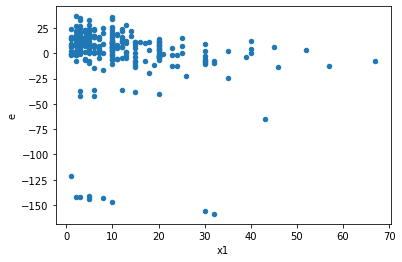

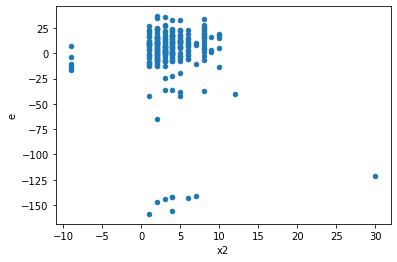

In [87]:
data.plot(x ='x1', y='e', kind = 'scatter')
data.plot(x ='x2', y='e', kind = 'scatter')

In [98]:
data_new = data.loc[data["e"] >= -147]
data_new

,x1,x2,y,y_hat,e
2,35.0,3.0,62.0,59.820065,2.179935
18,7.0,3.0,60.0,46.064942,13.935058
22,10.0,3.0,54.0,47.538705,6.461295
23,30.0,2.0,60.0,58.128899,1.871101
207,4.0,6.0,49.0,42.295859,6.704141
...,...,...,...,...,...
122928,11.0,1.0,58.0,49.560172,8.439828
123975,15.0,1.0,43.0,51.525189,-8.525189
124292,3.0,1.0,73.0,45.630136,27.369864
125762,4.0,1.0,55.0,46.121391,8.878609


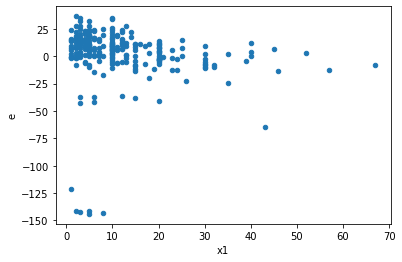

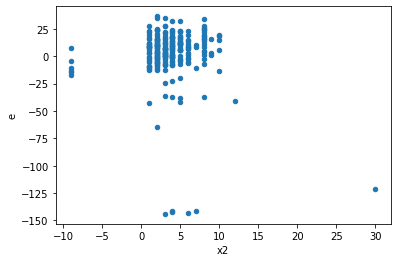

In [99]:
data_new.plot(x ='x1', y='e', kind = 'scatter')
data_new.plot(x ='x2', y='e', kind = 'scatter')

In [101]:
data_new0 = data_new.loc[data["e"] >= 0 ]
data_new0

,x1,x2,y,y_hat,e
2,35.0,3.0,62.0,59.820065,2.179935
18,7.0,3.0,60.0,46.064942,13.935058
22,10.0,3.0,54.0,47.538705,6.461295
23,30.0,2.0,60.0,58.128899,1.871101
207,4.0,6.0,49.0,42.295859,6.704141
...,...,...,...,...,...
118535,2.0,3.0,62.0,43.608669,18.391331
122928,11.0,1.0,58.0,49.560172,8.439828
124292,3.0,1.0,73.0,45.630136,27.369864
125762,4.0,1.0,55.0,46.121391,8.878609


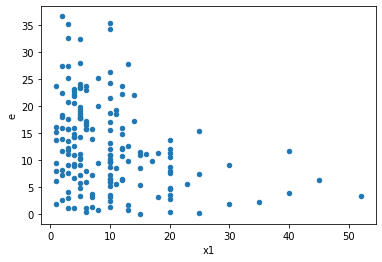

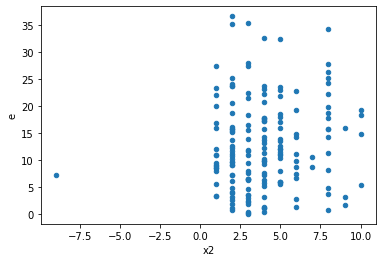

In [102]:
data_new0.plot(x ='x1', y='e', kind = 'scatter')
data_new0.plot(x ='x2', y='e', kind = 'scatter')

In [103]:
data_new1 = data_new0.loc[data["y_hat"] >= 44.05 ]
data_new1

,x1,x2,y,y_hat,e
2,35.0,3.0,62.0,59.820065,2.179935
18,7.0,3.0,60.0,46.064942,13.935058
22,10.0,3.0,54.0,47.538705,6.461295
23,30.0,2.0,60.0,58.128899,1.871101
505,12.0,4.0,70.0,47.756107,22.243893
...,...,...,...,...,...
113529,11.0,5.0,65.0,46.499747,18.500253
117706,4.0,1.0,57.0,46.121391,10.878609
122928,11.0,1.0,58.0,49.560172,8.439828
124292,3.0,1.0,73.0,45.630136,27.369864


In [ ]:
data_new.to_csv('CHNS_pexam_pub_12_U24BU23U36_new.csv')
files.download('CHNS_pexam_pub_12_U24BU23U36_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

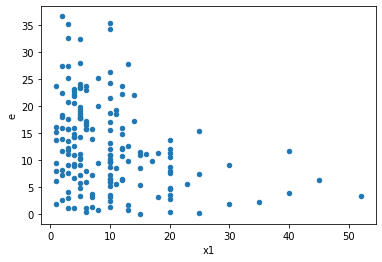

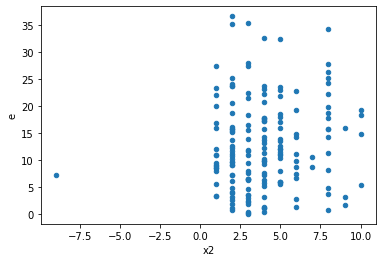

In [104]:
data_new0.plot(x ='x1', y='e', kind = 'scatter')
data_new0.plot(x ='x2', y='e', kind = 'scatter')

In [106]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,x2,y,y_hat,e
0,1.0,30.0,-99.0,22.459545,-121.459545
1,4.0,10.0,54.0,39.235434,14.764566
2,5.0,10.0,58.0,39.726689,18.273311
3,5.0,10.0,59.0,39.726689,19.273311
4,2.0,8.0,48.0,39.783138,8.216862
...,...,...,...,...,...
245,43.0,2.0,0.0,64.515207,-64.515207
246,45.0,3.0,71.0,64.732609,6.267391
247,52.0,1.0,73.0,69.701603,3.298397
248,57.0,1.0,60.0,72.157875,-12.157875


In [107]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [108]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new_1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new_1

,x1,x2,y,y_hat,e
0,1.0,30.0,-99.0,22.459545,-121.459545
1,4.0,10.0,54.0,39.235434,14.764566
2,5.0,10.0,58.0,39.726689,18.273311
3,5.0,10.0,59.0,39.726689,19.273311
4,2.0,8.0,48.0,39.783138,8.216862
...,...,...,...,...,...
95,10.0,6.0,44.0,45.243386,-1.243386
96,7.0,4.0,61.0,45.299835,15.700165
97,4.0,2.0,40.0,45.356285,-5.356285
98,4.0,2.0,39.0,45.356285,-6.356285


In [109]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new_1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new_1['y']
x = table_new_1[['x1', 'x2']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
DF1

98.0

In [111]:
SSE1

136800.07547187954

In [112]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new_2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new_2

,x1,x2,y,y_hat,e
150,10.0,3.0,51.0,47.538705,3.461295
151,10.0,3.0,63.0,47.538705,15.461295
152,10.0,3.0,50.0,47.538705,2.461295
153,10.0,3.0,83.0,47.538705,35.461295
154,10.0,3.0,54.0,47.538705,6.461295
...,...,...,...,...,...
245,43.0,2.0,0.0,64.515207,-64.515207
246,45.0,3.0,71.0,64.732609,6.267391
247,52.0,1.0,73.0,69.701603,3.298397
248,57.0,1.0,60.0,72.157875,-12.157875


In [113]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new_2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new_2['y']
x = table_new_2[['x1', 'x2']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
DF2

98.0

In [115]:
SSE2

16417.392241239773

In [116]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

0.12001011099306383

In [ ]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [ ]:
two_tailed

1.9991214809232416

In [ ]:
p_greater*2

0.0008785190767583974

In [ ]:
p_less

0.9995607404616208

###### The two-tailed p-value equals: 0.0008785

###### p( x < 0.3655 ) = 0.0004393
###### p( x > 0.3655 ) = 0.9996
###### p( x < 0.3655 ) + p( x >2.7356) = 0.0008785
###### Since p-value ≤ α, H0 is rejected. (0.0008785 ≤ 0.05)

https://www.statskingdom.com/p_value.html

In [ ]:
Significance = 0.01
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity


In [ ]:
Significance = 0.05
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity
